# Introduction
As housing prices become more expensive around other Canadian metropolitan cities due to an influx of foreign investors seeking opportunities abroad, taxation on foreign real estate buyers in these hot housing markets makes Montreal an attractive real estate prospect. 

The Montreal housing data is downloaded from the Open Government Partnership website (https://open.canada.ca) and quandl CMHC datasets. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quandl
from IPython import display

In [2]:
fields = ['REF_DATE', 'GEO', 'Completed dwelling units', 'Type of dwelling unit', 'VALUE']
absorption_data = pd.read_csv(r"real-Estate Data\Absorbtions and unabsorbed inventory.csv", parse_dates=['REF_DATE'], index_col=['REF_DATE'], usecols=fields, encoding='latin-1')

In [5]:
montreal_total_absorption_data = absorption_data[(absorption_data.GEO == 'Montréal, Quebec') & (absorption_data['Type of dwelling unit'] == 'Total units')]

In [6]:
montreal_absorption_MA = pd.DataFrame(index=montreal_total_absorption_data.groupby(['REF_DATE']).sum().index)
montreal_absorption_MA['Total'] = montreal_total_absorption_data.groupby(['REF_DATE','Type of dwelling unit']).sum().reset_index(['Type of dwelling unit'])['VALUE']
montreal_absorption_MA['Absorptions'] = montreal_total_absorption_data[montreal_total_absorption_data['Completed dwelling units'] == 'Absorptions']['VALUE']
montreal_absorption_MA['Unabsorbed inventory'] = montreal_total_absorption_data[montreal_total_absorption_data['Completed dwelling units'] == 'Unabsorbed inventory']['VALUE']

In [7]:
montreal_absorption_MA['Absorption %'] = montreal_absorption_MA['Absorptions']/test_df['Total']*100
montreal_absorption_MA['Unabsorbed inventory %'] = montreal_absorption_MA['Unabsorbed inventory']/test_df['Total']*100
montreal_absorption_MA['MA20 Absorption'] = montreal_absorption_MA['Absorption %'].rolling(window=20).mean()

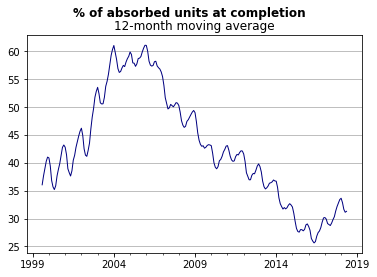

In [8]:
ax = test_df['MA20 Absorption'].plot(lw=1, colormap='jet')
ax.set_xlabel("")
ax.yaxis.grid()

plt.suptitle("% of absorbed units at completion", fontweight="bold")
plt.title("12-month moving average")
plt.show()

Interesting enough, the 12-month moving average seems to be rebounding from its lowest year (2016) which may indicate an increase in overall demand as buyers from Toronto and Vancouver affected by foreign luxury taxes seek other Canadian opportunities. We use 12-month moving average to smooth out yearly cyclicalities.  